**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Vitamin Deficiency Dataset](https://www.kaggle.com/datasets/nudratabbas/vitamin-deficiency-disease-prediction-dataset/code)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vitamin-deficiency-disease-prediction-dataset/vitamin_deficiency_disease_dataset_20260123.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('/kaggle/input/vitamin-deficiency-disease-prediction-dataset/vitamin_deficiency_disease_dataset_20260123.csv')

# Preprocessing

## Frist five row

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,age,gender,bmi,smoking_status,alcohol_consumption,exercise_level,diet_type,sun_exposure,income_level,latitude_region,vitamin_a_percent_rda,vitamin_c_percent_rda,vitamin_d_percent_rda,vitamin_e_percent_rda,vitamin_b12_percent_rda,folate_percent_rda,calcium_percent_rda,iron_percent_rda,hemoglobin_g_dl,serum_vitamin_d_ng_ml,serum_vitamin_b12_pg_ml,serum_folate_ng_ml,symptoms_count,symptoms_list,has_night_blindness,has_fatigue,has_bleeding_gums,has_bone_pain,has_muscle_weakness,has_numbness_tingling,has_memory_problems,has_pale_skin,disease_diagnosis,has_multiple_deficiencies
0,79,Male,24.8,Former,NaN,Active,Vegetarian,High,High,Mid,119.1,147.3,152.88,97.5,102.5,188.9,108.3,97.4,13.5,39.3,356.4,23.3,0,NaN,0,0,0,0,0,0,0,0,Healthy,0
1,77,Female,39.9,Former,Moderate,Light,Omnivore,Low,Low,Low,85.7,57.5,32.76,82.7,62.6,51.0,42.6,102.5,15.4,8.9,303.0,5.3,1,bone_pain,0,0,0,1,0,0,0,0,Rickets_Osteomalacia,0
2,24,Male,26.4,Former,Heavy,Moderate,Omnivore,Low,High,High,48.3,152.1,94.99,169.3,136.2,116.6,136.3,86.4,14.1,29.9,578.0,16.3,2,dry_skin;night_blindness,1,0,0,0,0,0,0,0,Healthy,0
3,69,Male,23.1,Never,Heavy,Moderate,Vegetarian,High,Low,Low,75.8,51.0,51.48,85.7,31.8,66.5,76.5,60.8,12.3,20.2,144.8,9.2,2,numbness_tingling;memory_problems,0,0,0,0,0,1,1,0,Anemia,0
4,63,Male,29.6,Never,NaN,Moderate,Vegetarian,Moderate,High,Low,93.3,111.5,62.90,155.6,72.6,124.9,69.4,71.9,15.1,20.7,348.2,13.4,0,NaN,0,0,0,0,0,0,0,0,Healthy,0


## last Five row

In [4]:
df.tail()

,age,gender,bmi,smoking_status,alcohol_consumption,exercise_level,diet_type,sun_exposure,income_level,latitude_region,vitamin_a_percent_rda,vitamin_c_percent_rda,vitamin_d_percent_rda,vitamin_e_percent_rda,vitamin_b12_percent_rda,folate_percent_rda,calcium_percent_rda,iron_percent_rda,hemoglobin_g_dl,serum_vitamin_d_ng_ml,serum_vitamin_b12_pg_ml,serum_folate_ng_ml,symptoms_count,symptoms_list,has_night_blindness,has_fatigue,has_bleeding_gums,has_bone_pain,has_muscle_weakness,has_numbness_tingling,has_memory_problems,has_pale_skin,disease_diagnosis,has_multiple_deficiencies
3995,25,Female,21.6,Former,Heavy,Active,Pescatarian,Moderate,Middle,High,41.4,66.1,111.50,99.8,72.8,77.0,142.0,72.9,15.3,34.8,346.7,9.2,1,night_blindness,1,0,0,0,0,0,0,0,Healthy,0
3996,50,Male,29.5,Former,Moderate,Sedentary,Vegetarian,Low,High,Low,146.3,113.0,72.66,91.5,99.4,120.1,101.4,94.1,13.8,19.9,272.2,15.0,0,NaN,0,0,0,0,0,0,0,0,Healthy,0
3997,34,Female,24.8,Never,NaN,Active,Pescatarian,Moderate,Low,Low,77.0,39.8,76.10,43.2,41.6,62.7,43.9,53.7,13.4,21.4,100.0,4.8,3,numbness_tingling;memory_problems;fatigue,0,1,0,0,0,1,1,0,Anemia,0
3998,39,Female,26.9,Former,Heavy,Active,Omnivore,High,Low,High,41.1,71.2,75.79,32.5,53.4,47.3,15.4,56.3,14.1,23.5,138.8,6.1,2,dry_skin;night_blindness,1,0,0,0,0,0,0,0,Anemia,0
3999,41,Female,28.0,Current,NaN,Sedentary,Omnivore,High,High,High,135.6,63.7,155.61,170.0,38.8,127.7,130.9,130.5,13.3,55.9,122.7,11.0,1,memory_problems,0,0,0,0,0,0,1,0,Anemia,0


## Shape of our dataset

In [5]:
df.shape

(4000, 34)

## List out all columns

In [6]:
df.columns

Index(['age', 'gender', 'bmi', 'smoking_status', 'alcohol_consumption',
       'exercise_level', 'diet_type', 'sun_exposure', 'income_level',
       'latitude_region', 'vitamin_a_percent_rda', 'vitamin_c_percent_rda',
       'vitamin_d_percent_rda', 'vitamin_e_percent_rda',
       'vitamin_b12_percent_rda', 'folate_percent_rda', 'calcium_percent_rda',
       'iron_percent_rda', 'hemoglobin_g_dl', 'serum_vitamin_d_ng_ml',
       'serum_vitamin_b12_pg_ml', 'serum_folate_ng_ml', 'symptoms_count',
       'symptoms_list', 'has_night_blindness', 'has_fatigue',
       'has_bleeding_gums', 'has_bone_pain', 'has_muscle_weakness',
       'has_numbness_tingling', 'has_memory_problems', 'has_pale_skin',
       'disease_diagnosis', 'has_multiple_deficiencies'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

age                            int64
gender                        object
bmi                          float64
smoking_status                object
alcohol_consumption           object
exercise_level                object
diet_type                     object
sun_exposure                  object
income_level                  object
latitude_region               object
vitamin_a_percent_rda        float64
vitamin_c_percent_rda        float64
vitamin_d_percent_rda        float64
vitamin_e_percent_rda        float64
vitamin_b12_percent_rda      float64
folate_percent_rda           float64
calcium_percent_rda          float64
iron_percent_rda             float64
hemoglobin_g_dl              float64
serum_vitamin_d_ng_ml        float64
serum_vitamin_b12_pg_ml      float64
serum_folate_ng_ml           float64
symptoms_count                 int64
symptoms_list                 object
has_night_blindness            int64
has_fatigue                    int64
has_bleeding_gums              int64
h

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4000 non-null   int64  
 1   gender                     4000 non-null   object 
 2   bmi                        4000 non-null   float64
 3   smoking_status             4000 non-null   object 
 4   alcohol_consumption        2722 non-null   object 
 5   exercise_level             4000 non-null   object 
 6   diet_type                  4000 non-null   object 
 7   sun_exposure               4000 non-null   object 
 8   income_level               4000 non-null   object 
 9   latitude_region            4000 non-null   object 
 10  vitamin_a_percent_rda      4000 non-null   float64
 11  vitamin_c_percent_rda      4000 non-null   float64
 12  vitamin_d_percent_rda      4000 non-null   float64
 13  vitamin_e_percent_rda      4000 non-null   float

## Check Null Value

In [9]:
df.isnull().sum() 

age                             0
gender                          0
bmi                             0
smoking_status                  0
alcohol_consumption          1278
exercise_level                  0
diet_type                       0
sun_exposure                    0
income_level                    0
latitude_region                 0
vitamin_a_percent_rda           0
vitamin_c_percent_rda           0
vitamin_d_percent_rda           0
vitamin_e_percent_rda           0
vitamin_b12_percent_rda         0
folate_percent_rda              0
calcium_percent_rda             0
iron_percent_rda                0
hemoglobin_g_dl                 0
serum_vitamin_d_ng_ml           0
serum_vitamin_b12_pg_ml         0
serum_folate_ng_ml              0
symptoms_count                  0
symptoms_list                1328
has_night_blindness             0
has_fatigue                     0
has_bleeding_gums               0
has_bone_pain                   0
has_muscle_weakness             0
has_numbness_t

## Drop Duplicated Features

In [10]:
df.drop(columns=['symptoms_list', 'alcohol_consumption'], inplace=True)

## Check Dupicate Value

In [11]:
df.duplicated().sum()

np.int64(0)

## Summary

In [12]:
df.describe()

,age,bmi,vitamin_a_percent_rda,vitamin_c_percent_rda,vitamin_d_percent_rda,vitamin_e_percent_rda,vitamin_b12_percent_rda,folate_percent_rda,calcium_percent_rda,iron_percent_rda,hemoglobin_g_dl,serum_vitamin_d_ng_ml,serum_vitamin_b12_pg_ml,serum_folate_ng_ml,symptoms_count,has_night_blindness,has_fatigue,has_bleeding_gums,has_bone_pain,has_muscle_weakness,has_numbness_tingling,has_memory_problems,has_pale_skin,has_multiple_deficiencies
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,50.766250,26.105325,90.770850,89.199075,72.216388,89.946125,62.743225,90.382275,82.586300,76.211125,14.027200,21.744050,255.514725,10.831725,1.86725,0.102250,0.269250,0.043500,0.300750,0.265750,0.351250,0.303000,0.161750,0.347250
std,19.306237,4.922746,37.083534,37.505809,42.831000,37.444649,37.396636,37.563684,36.359131,33.226984,1.665629,13.768642,158.934806,4.965111,1.79581,0.303015,0.443626,0.204005,0.458641,0.441787,0.477421,0.459613,0.368267,0.476156
min,18.000000,15.000000,10.000000,10.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.200000,5.000000,100.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,22.800000,62.600000,60.975000,40.730000,61.700000,32.700000,61.800000,55.600000,51.400000,12.900000,11.700000,121.200000,7.100000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,26.200000,85.500000,83.500000,62.270000,84.050000,55.600000,84.800000,77.100000,71.250000,14.100000,18.400000,214.850000,10.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67.000000,29.400000,115.300000,113.000000,93.317500,114.100000,84.500000,115.200000,105.300000,95.900000,15.100000,27.900000,338.400000,13.800000,3.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,84.000000,45.000000,219.000000,250.000000,275.600000,237.600000,243.600000,226.600000,232.700000,211.400000,18.000000,80.000000,1138.100000,25.000000,9.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EDA

In [13]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

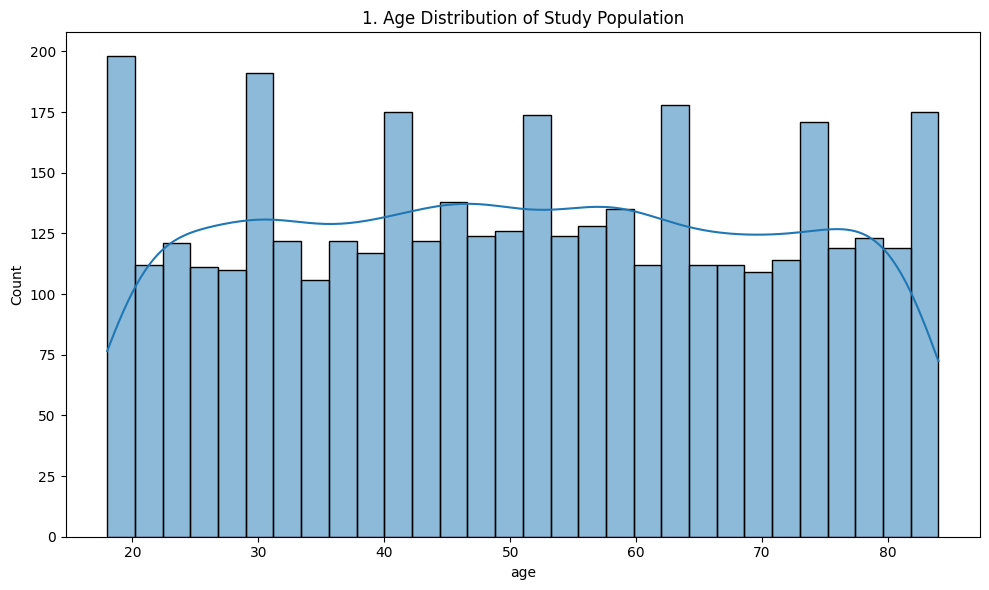

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title(f'{plot_no}. Age Distribution of Study Population')
show_fig()
plot_no += 1


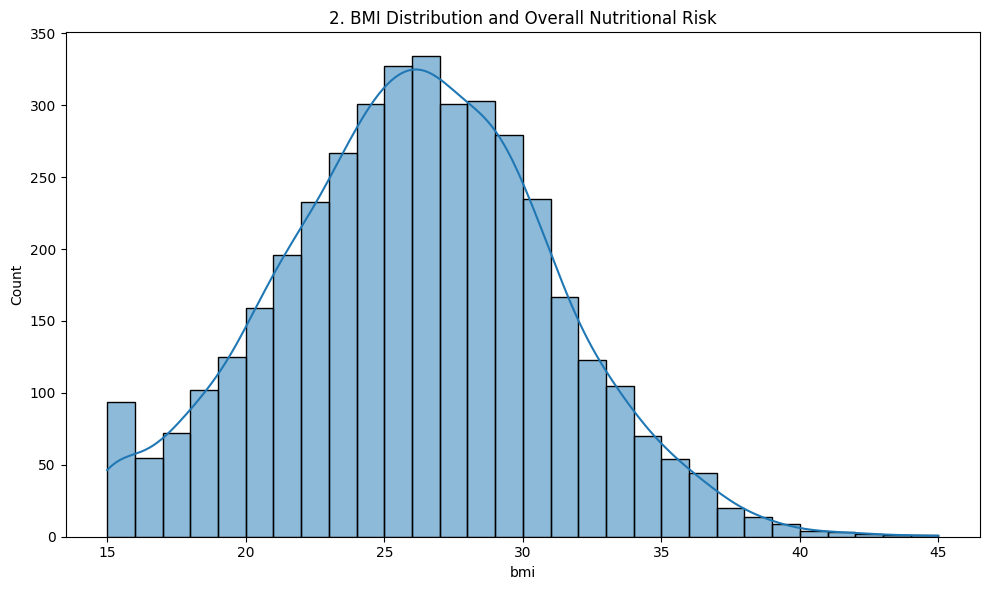

In [15]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title(f'{plot_no}. BMI Distribution and Overall Nutritional Risk')
show_fig()
plot_no += 1


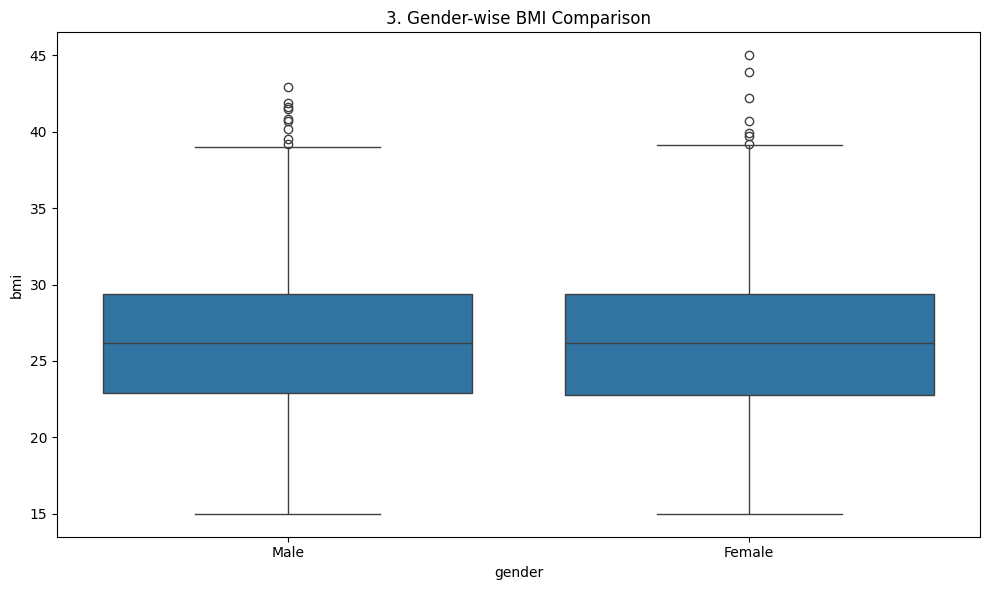

In [16]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='gender', y='bmi', data=df)
plt.title(f'{plot_no}. Gender-wise BMI Comparison')
show_fig()
plot_no += 1


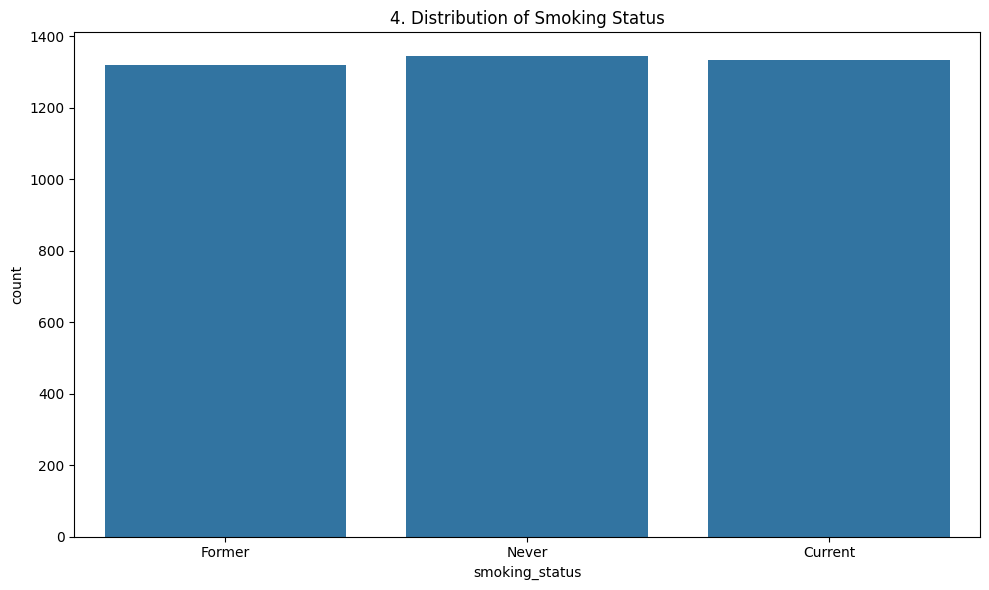

In [17]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='smoking_status', data=df)
plt.title(f'{plot_no}. Distribution of Smoking Status')
show_fig()
plot_no += 1


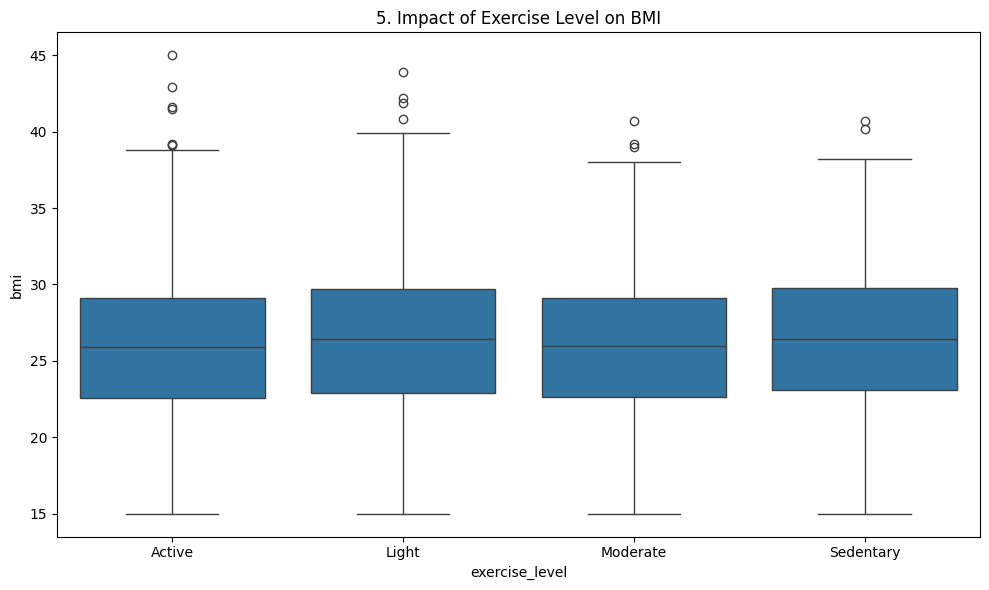

In [18]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='exercise_level', y='bmi', data=df)
plt.title(f'{plot_no}. Impact of Exercise Level on BMI')
show_fig()
plot_no += 1


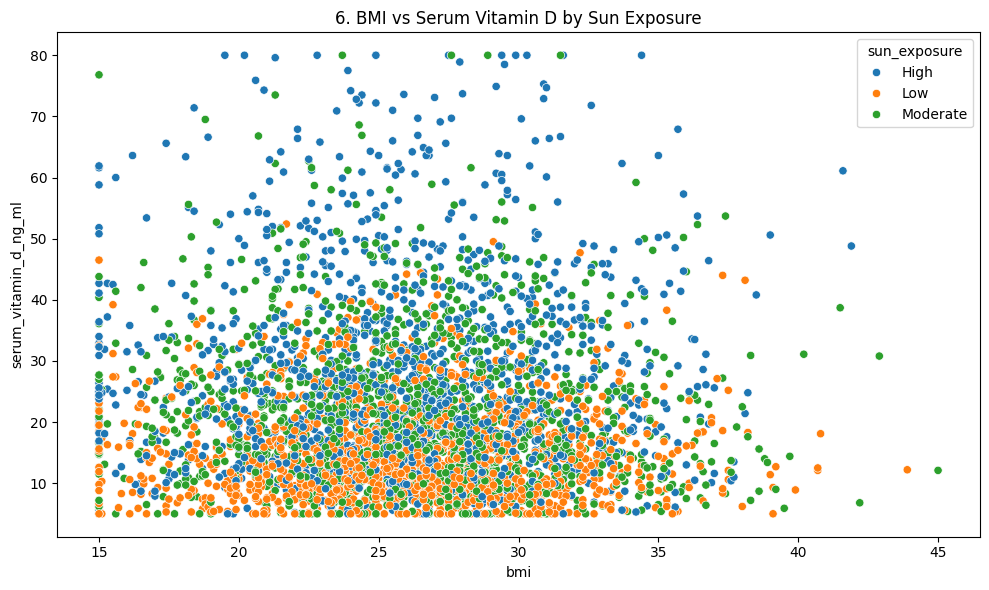

In [19]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='serum_vitamin_d_ng_ml', hue='sun_exposure', data=df)
plt.title(f'{plot_no}. BMI vs Serum Vitamin D by Sun Exposure')
show_fig()
plot_no += 1


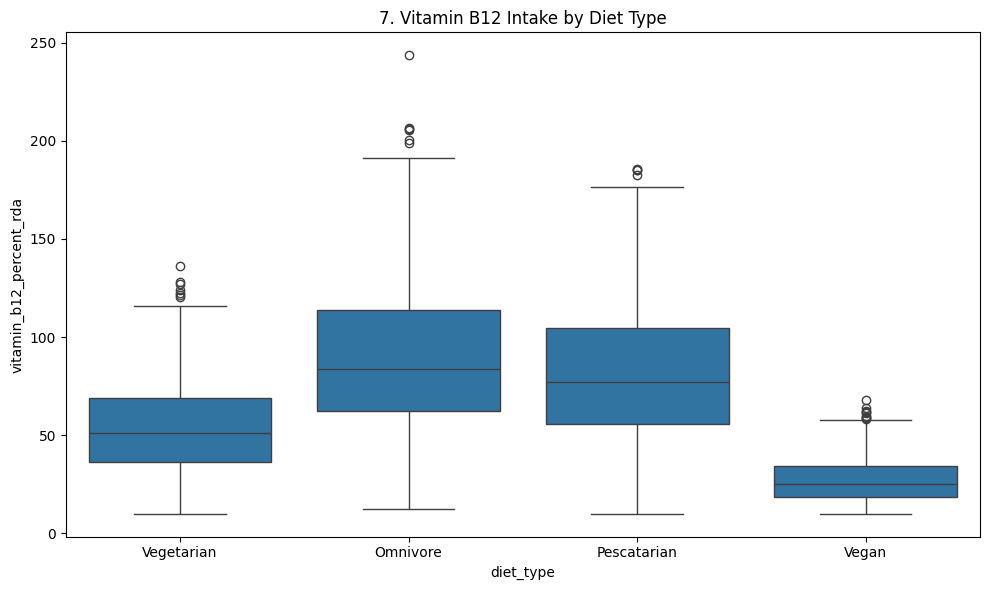

In [20]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='diet_type', y='vitamin_b12_percent_rda', data=df)
plt.title(f'{plot_no}. Vitamin B12 Intake by Diet Type')
show_fig()
plot_no += 1


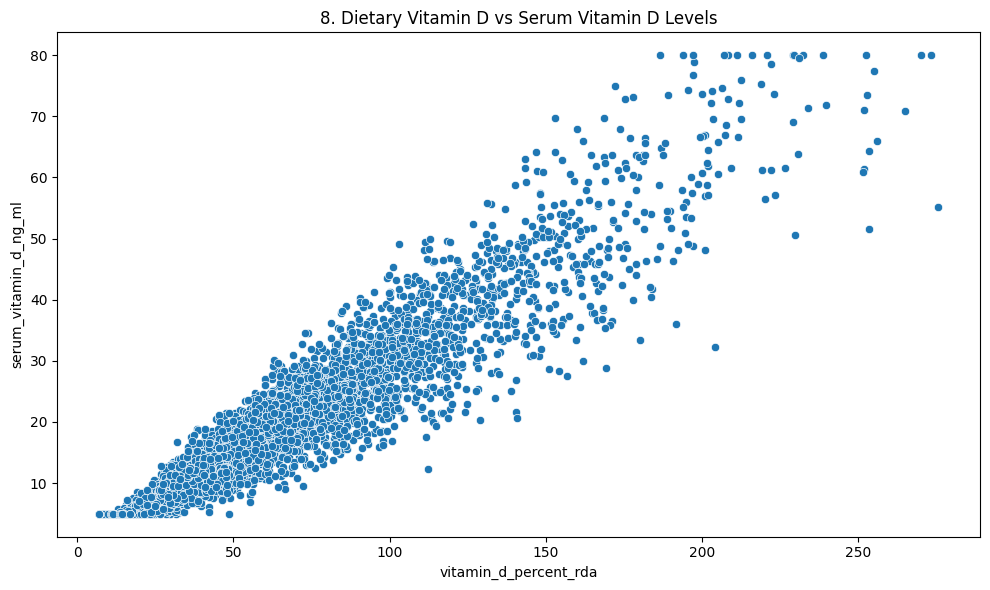

In [21]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='vitamin_d_percent_rda', y='serum_vitamin_d_ng_ml', data=df)
plt.title(f'{plot_no}. Dietary Vitamin D vs Serum Vitamin D Levels')
show_fig()
plot_no += 1


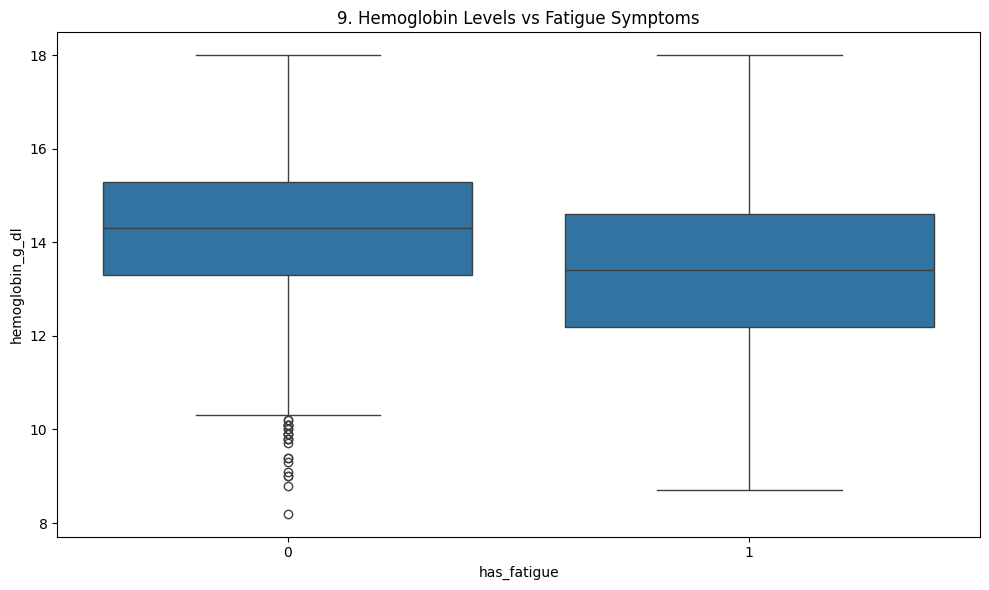

In [22]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='has_fatigue', y='hemoglobin_g_dl', data=df)
plt.title(f'{plot_no}. Hemoglobin Levels vs Fatigue Symptoms')
show_fig()
plot_no += 1


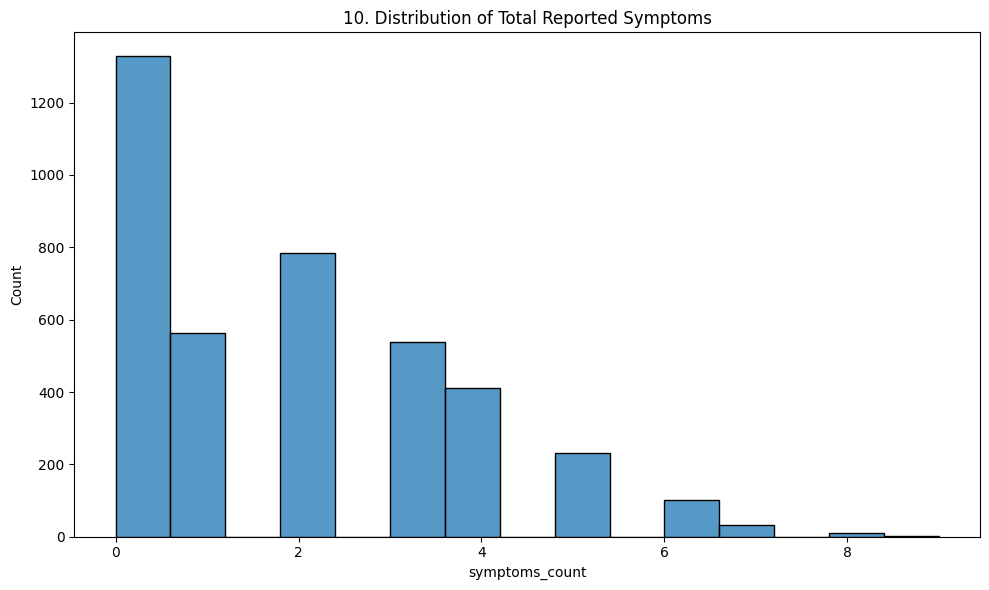

In [23]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['symptoms_count'], bins=15)
plt.title(f'{plot_no}. Distribution of Total Reported Symptoms')
show_fig()
plot_no += 1


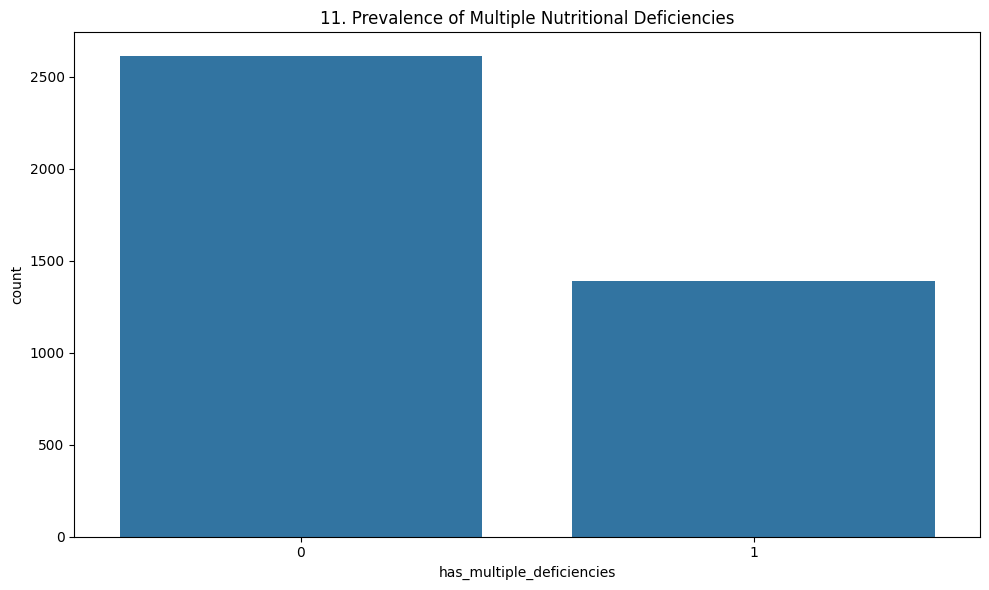

In [24]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='has_multiple_deficiencies', data=df)
plt.title(f'{plot_no}. Prevalence of Multiple Nutritional Deficiencies')
show_fig()
plot_no += 1


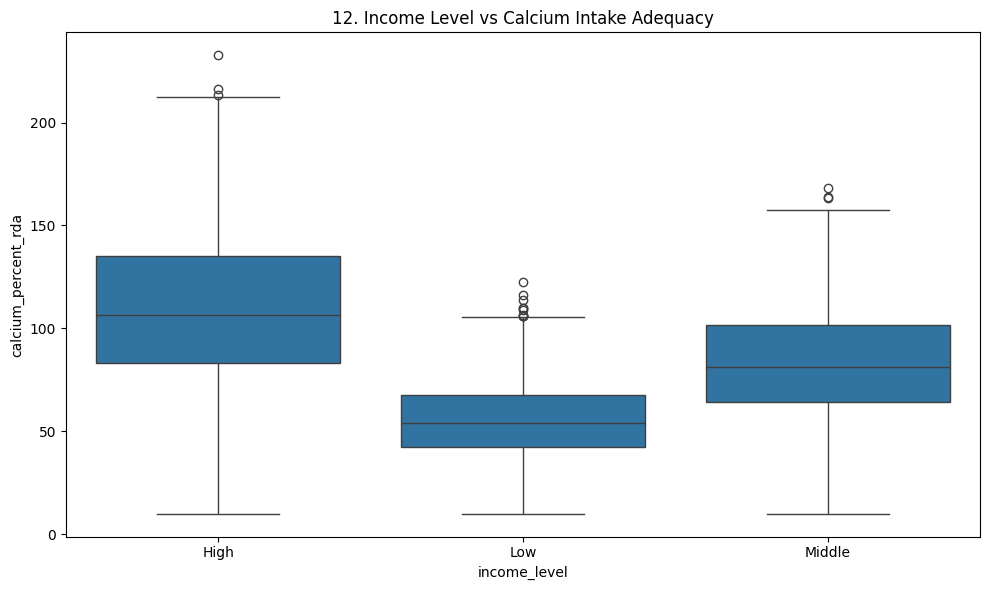

In [25]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='income_level', y='calcium_percent_rda', data=df)
plt.title(f'{plot_no}. Income Level vs Calcium Intake Adequacy')
show_fig()
plot_no += 1


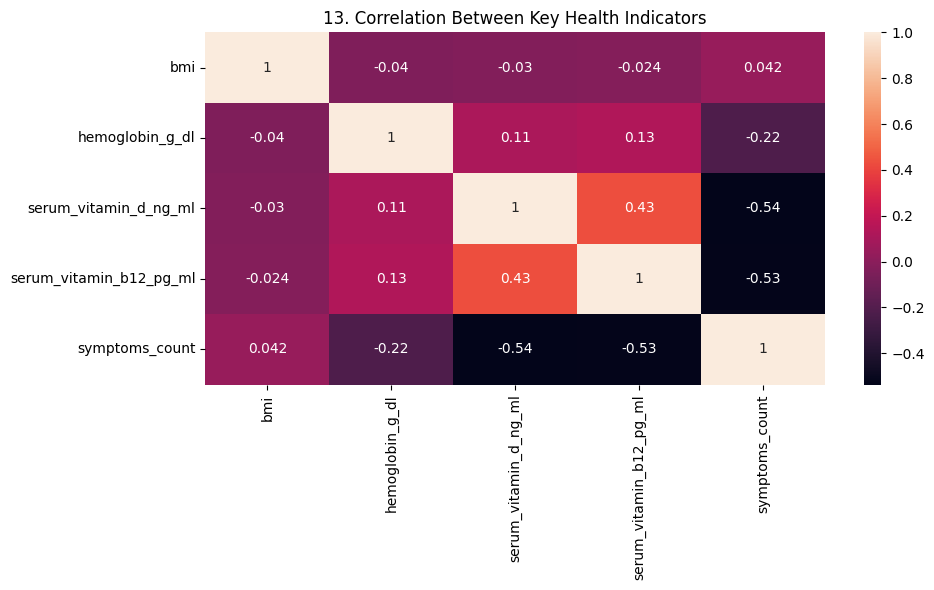

In [26]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df[['bmi','hemoglobin_g_dl','serum_vitamin_d_ng_ml','serum_vitamin_b12_pg_ml','symptoms_count']].corr(), annot=True)
plt.title(f'{plot_no}. Correlation Between Key Health Indicators')
show_fig()
plot_no += 1


# Model Training

## Select target and features

In [27]:
target = 'has_multiple_deficiencies'
X = df.drop(columns=[target, 'disease_diagnosis'])
y = df[target]

## Encode categorical features

In [28]:
categorical_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

## Train-test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

## Feature scaling

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train supervised model (Logistic Regression)

In [31]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## Predictions

In [32]:
y_pred = model.predict(X_test_scaled)

## Accuracy score

In [33]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 88.7000


## Confusion Matrix

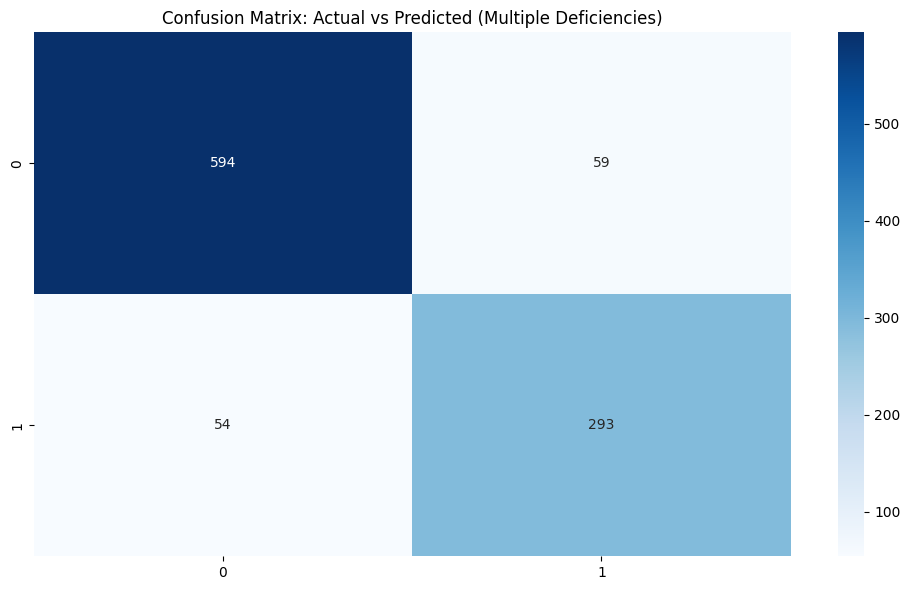

In [34]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Actual vs Predicted (Multiple Deficiencies)')
show_fig()
plot_no += 1